In [204]:
import numpy as np
import matplotlib.pyplot as plt


Идея дествительно сработала. Так что можно расширить мою идею и продолжить работать уже над ней.   
Осталось только сделать соответсвующие функции.


In [3]:
def build_diff(N):
    """input: dimensial
    output: Differential operator for normal polynom"""
    mas = np.zeros((N, N))
    for i in range(N-1):
        mas[i, i+1] = i+1
    return mas
build_diff(4)

array([[0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.],
       [0., 0., 0., 0.]])

In [18]:
def array_shift(array):
    return np.insert(array, 0, 0)[:-1] # add 0 in the beginning

def build_change_poly(N, poly = 'legandre'):
    mas = np.zeros((N, N))
    mas[0,0] = 1
    mas[1,1] = 1
    if poly == 'legandre':
        for n in range(2, N):
            mas[:, n] = (2*n - 1)/n * array_shift(mas[:, n-1]) - (n-1)/n*mas[:, n-2]
        return mas
    elif poly == 'cheb_1':
        for n in range(2, N):
            mas[:, n] = 2* array_shift(mas[:, n-1]) - mas[:, n-2]
        return mas
    elif poly == 'cheb_2':
        mas[1,1] = 2
        for n in range(2, N):
            mas[:, n] = 2*array_shift(mas[:, n-1]) - mas[:, n-2]
        return mas
    else:
        print('Try another polynomials')
        
print("From legandre to normal poly\n", build_change_poly(5, 'legandre'))
print("From cheb_1 to normal poly\n", build_change_poly(5, 'cheb_1'))
print("From cheb_2 to normal poly\n", build_change_poly(5, 'cheb_2'))

From legandre to normal poly
 [[ 1.     0.    -0.5    0.     0.375]
 [ 0.     1.     0.    -1.5    0.   ]
 [ 0.     0.     1.5    0.    -3.75 ]
 [ 0.     0.     0.     2.5    0.   ]
 [ 0.     0.     0.     0.     4.375]]
From cheb_1 to normal poly
 [[ 1.  0. -1.  0.  1.]
 [ 0.  1.  0. -3.  0.]
 [ 0.  0.  2.  0. -8.]
 [ 0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  8.]]
From cheb_2 to normal poly
 [[  1.   0.  -1.   0.   1.]
 [  0.   2.   0.  -4.   0.]
 [  0.   0.   4.   0. -12.]
 [  0.   0.   0.   8.   0.]
 [  0.   0.   0.   0.  16.]]


In [22]:
def build_diff_operator(N, poly = 'legandre'):
    A = build_change_poly(N, poly)
    Diff = build_diff(N)
    A_inverse = np.linalg.inv(A)
       
    mas_tmp = np.dot(Diff, A)
    matrix_result = np.dot(A_inverse, mas_tmp)
    return matrix_result
 


Построил оператор частной производной по x для базиса( N = 3):  
$1$  
$x$  
$x^2$  
$1$   
$y$    
$y^2$  
$xy$   
$xy^2$  
$x^2y$     
$x^2y^2$


### dX

In [28]:
N = 3
mas = build_diff(N)
print(mas)
dim = 2*N + int((N-1)**2)
big_mas_dx = np.zeros((dim, dim))
big_mas_dx[:N, :N] = mas

k = 0
for num in range(1, N):
    for j in range(1, N):
        big_mas_dx[N+1+k, 2*N+k] = num
        k+=1
print(big_mas_dx)

[[0. 1. 0.]
 [0. 0. 2.]
 [0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]



### dY

In [45]:
N = 3
mas = build_diff(N)
print(mas)
dim = 2*N + int((N-1)**2)
big_mas_dy = np.zeros((dim, dim))
big_mas_dy[N:2*N, N:2*N] = mas


k = 0
for j in range(0, N-1):
    big_mas_dy[j+1, 2*N+k] = 1
    k+=1
    for num in range(2, N):
        big_mas_dy[2*N+k-1, 2*N+k] = num
        k+=1

print(big_mas_dy)

[[0. 1. 0.]
 [0. 0. 2.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
operator_dx_dy = np.vstack((big_mas_dx, big_mas_dy))
operator_dx_dy

Объединять теперь нужно.   
Это совсем несложно


In [223]:
def diff_2_var(N):
    mas = build_diff(N)
    dim = 2*N + int((N-1)**2)
    
    #d/dx
    big_mas_dx = np.zeros((dim, dim))
    big_mas_dx[:N, :N] = mas
    k = 0
    for num in range(1, N):
        for j in range(1, N):
            big_mas_dx[N+1+k, 2*N+k] = num
            k+=1
    
    #d/dy
    big_mas_dy = np.zeros((dim, dim))
    big_mas_dy[N:2*N, N:2*N] = mas
    k = 0
    for j in range(0, N-1):
        big_mas_dy[j+1, 2*N+k] = 1
        k+=1
        for num in range(2, N):
            big_mas_dy[2*N+k-1, 2*N+k] = num
            k+=1

    operator_dx_dy = np.vstack((big_mas_dx, big_mas_dy))
    return operator_dx_dy
    
    



Теперб нужно думать над тем, как перевести комбинированный Лежандр в наш базис, в котором мы работаем.
Надо придумать, как масштабировать это место. Очень слабенько пока что


In [152]:
def multiple_coef(p1, p2):
    N = p1.shape[0]
    dim = 2*N + int((N-1)**2)
    mas = np.zeros(dim)
    
    for i in range(N):
        mas[i] =  p1[i]*p2[0]
    for r in range(1, N):
        for i in range(N):
            mas[N+r+i*(N-1)] = p1[i] * p2[r]
    return mas

In [219]:
def change_poly_2_var(N, poly = 'legandre'):
    dim = 2*N + int((N-1)**2)
    change_mas = np.zeros((dim, dim))
    
    mas = build_change_poly(N, poly = poly)
    change_mas[:N, :N] = mas                  
    change_mas[N:2*N, N:2*N] = mas
    
    k = 0 
    for x_col in range(1, N):
        for y_col in range(1, N):
            p1 = change_mas[:N, x_col]
            p2 = change_mas[N:2*N, N+y_col]

            change_mas[:, 2*N+k] = multiple_coef(p1, p2)
            k += 1
            
    return change_mas





In [ ]:
def inverse_change_poly(change_mas):
    r, c = change_mas.shape
    change_mas_inv = np.linalg.inv(change_mas)
    combine_inverse = np.zeros((2*r,2*c ))
    combine_inverse[:r, :c] = change_mas_inv
    combine_inverse[r:, c:] = change_mas_inv
    return combine_inverse

10

In [220]:
def diff_operator_2_var(N, poly = 'legandre'):
    """Combine all function
    Build operator for 'poly' basis.
    You can choose: legandre, cheb_1, cheb_2"""
    A = change_poly_2_var(N, poly)
    diff = diff_2_var(N)
    A_inverse = inverse_change_poly(A)
    
    A_tmp = np.dot(diff, A)
    matrix_result = np.dot(A_inverse, A_tmp)
    return matrix_result

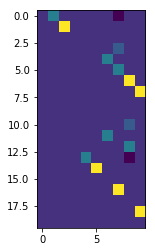

In [232]:
plt.imshow(diff_operator_2_var(3))

### Тестирование

In [262]:
N = 3
dim = 2*N + int((N-1)**2)
def test_1(poly = 'legandre'):
    zero_mas = np.zeros(dim)
    coef = np.zeros(dim)
    coef[0] = 10
    diff_coef = np.dot(diff_operator_2_var(N), coef)
    print('Test 1 passed ' if np.array_equal(diff_coef[:dim],zero_mas ) else "Not passed")
    
    coef = np.zeros(dim)
    # p2(x) + p2(y) where p2(x)= 2*x^2 - 1
    coef[2] = 1; coef[5] = 1
    
    diff_coef = np.dot(diff_operator_2_var(N, 'cheb_1'), coef)
    test_mas = np.zeros(2*dim)
    test_mas[1] = 4 ; test_mas[dim + N + 1] = 4
    
    print('Test 2 passed ' if np.array_equal(diff_coef,test_mas ) else "Not passed")
    test_1()

Test 1 passed 
Test 2 passed 


In [258]:
coef = np.zeros(dim)
    # p2(x) + p2(y) where p2(x)= 2*x^2 - 1
coef[2] = 1
coef[5] = 1
coef
np.dot(diff_operator_2_var(N, 'cheb_1'), coef)

array([0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0.,
       0., 0., 0.])

#### Графики

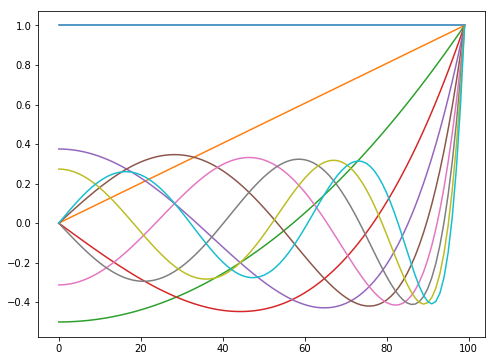

In [272]:
from scipy.special import legendre
from scipy.special import chebyt # первого рода
from scipy.special import chebyu # второго рода


N = 10
lenght = 100
Pn = [0]*N
for i in range(N):
    Pn[i] = legendre(i)
x = np.linspace(0,1, lenght)
plt.figure(figsize = (8,6))

def values_polynomial(N, lenght, poly = 'legandre'):
    if poly =='legandre':
        matrix_basis = np.zeros((N, lenght))
        x = np.linspace(0,1, lenght)
        for i in range(N):
            Pn[i] = legendre(i)
            matrix_basis[i] = Pn[i](x)
    elif poly =='cheb_1':
        matrix_basis = np.zeros((N, lenght))
        x = np.linspace(0,1, lenght)
        for i in range(N):
            Pn[i] = chebyt(i)
            matrix_basis[i] = Pn[i](x)
    elif poly =='cheb_2':
        matrix_basis = np.zeros((N, lenght))
        x = np.linspace(0,1, lenght)
        for i in range(N):
            Pn[i] = chebyu(i)
            matrix_basis[i] = Pn[i](x)
    else:
        return 'Error'
    return matrix_basis


mas = values_polynomial(N, lenght, poly = 'legandre' )
